In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from salishsea_tools import viz_tools
import cmocean as cm

### Import data

In [2]:
abort = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/26feb23/output.abort.nc')
feb25_GridU = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_U.nc')
feb25_GridV = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_V.nc')
feb25_GridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')
feb25_restart = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_00034560_restart.nc')

xIdxAb = 226 -1     #fortran indexing starts at 1
yIdxAb = 374 -1     #fortran indexing starts at 1

abort

<xarray.Dataset>
Dimensions:       (y: 826, x: 710, deptht: 39, time_counter: 1)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 333.8 360.7 387.6 414.5
  * time_counter  (time_counter) datetime64[ns] 2023-02-26T00:00:19
Dimensions without coordinates: y, x
Data variables: (12/14)
    vosaline      (time_counter, deptht, y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    vozocrtx      (time_counter, deptht, y, x) float32 ...
    vomecrty      (time_counter, deptht, y, x) float32 ...
    vovecrtz      (time_counter, deptht, y, x) float32 ...
    ...            ...
    soshfldo      (time_counter, y, x) float32 ...
    soicecov      (time_counter, y, x) float32 ...
    sozotaux      (time_counter, y, x) float32 ...
    sometauy      (time_counter, y, x) float32 ...
    vovvldep      (time_counter, deptht, y, x) float32 ...
    vovvle3t      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    12/11/2024 15:19:54 -0800
    file_name:    output.abort.nc

In [51]:
# Import mesh data
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]
vmask = 1 - mesh.vmask[0]

### Look at 25feb23 restart

In [26]:
feb25_restart

<xarray.Dataset>
Dimensions:       (y: 826, x: 710, z: 39, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/47)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    kt            float64 ...
    ndastp        float64 ...
    ...            ...
    tn            (t, z, y, x) float64 ...
    sn            (t, z, y, x) float64 ...
    rotn          (t, z, y, x) float64 ...
    hdivn         (t, z, y, x) float64 ...
    sshn          (t, y, x) float64 ...
    rhop          (t, z, y, x) float64 ...
Attributes:
    file_name:  sss150_00034560_restart.nc
    TimeStamp:  22/11/2024 21:03:18 -0800

Text(0.5, 1.0, 'Diff')

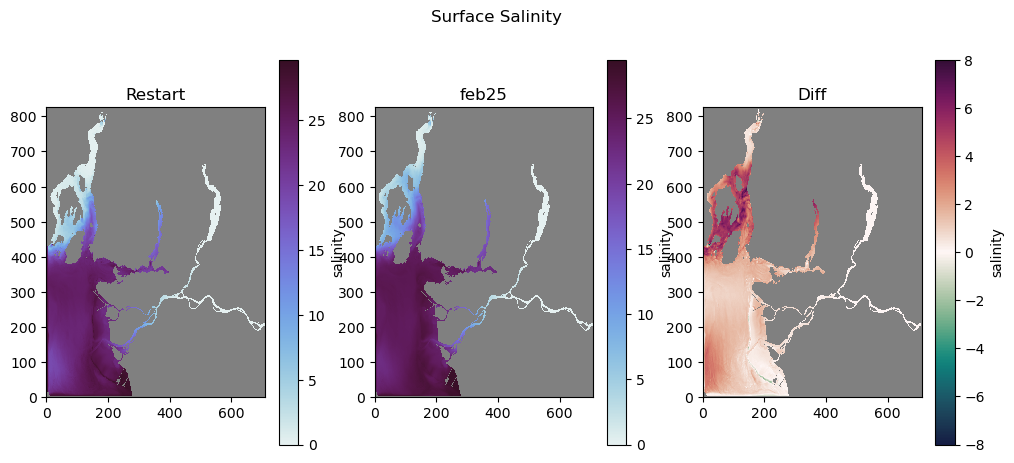

In [38]:
masked_sn = np.ma.masked_array(feb25_restart['sn'][0,0], mask=tmask[0])
masked_sal = np.ma.masked_array(feb25_GridT.vosaline[23, 0], mask=tmask[0])

cmap1 = cm.cm.dense
cmap1.set_bad('grey')

cmap2 = cm.cm.curl
cmap2.set_bad('grey')

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_sn,cmap=cmap1)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('salinity')
fig.suptitle('Surface Salinity')
ax.set_title('Restart')

pm = ax1.pcolormesh(masked_sal,cmap=cmap1)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax1.set_title('feb25')

pm = ax2.pcolormesh(masked_sal - masked_sn,cmap=cmap2,vmin=-8,vmax=8)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax2.set_title('Diff')

Text(0.5, 1.0, 'Diff')

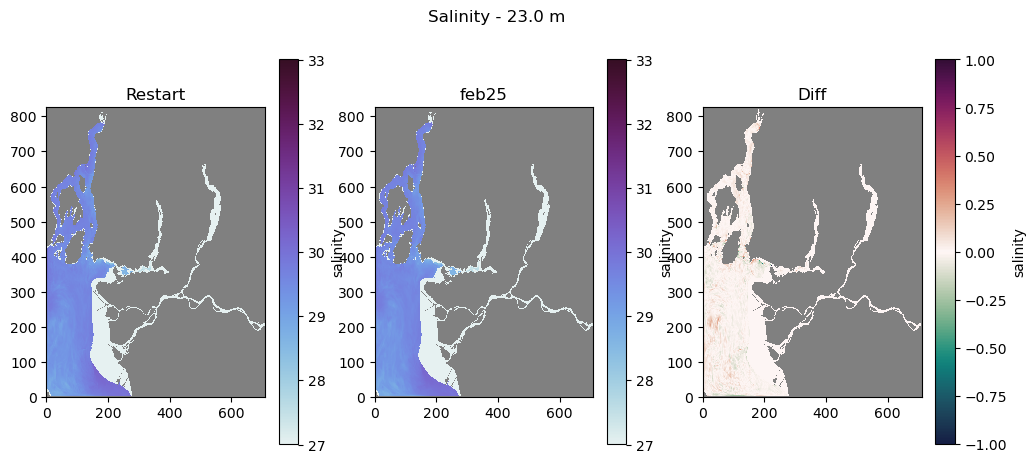

In [35]:
masked_snD = np.ma.masked_array(feb25_restart['sn'][0,20], mask=tmask[0])
masked_salD = np.ma.masked_array(feb25_GridT.vosaline[23, 20], mask=tmask[0])

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_snD,cmap=cmap1,vmin=27,vmax=33)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('salinity')
fig.suptitle(f'Salinity - {np.round(mesh.gdepw_1d[0,20].values)} m')
ax.set_title('Restart')

pm = ax1.pcolormesh(masked_salD,cmap=cmap1,vmin=27,vmax=33)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax1.set_title('feb25')

pm = ax2.pcolormesh(masked_salD - masked_snD,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('salinity')
ax2.set_title('Diff')

### Look at temperature

Text(0.5, 1.0, 'Diff')

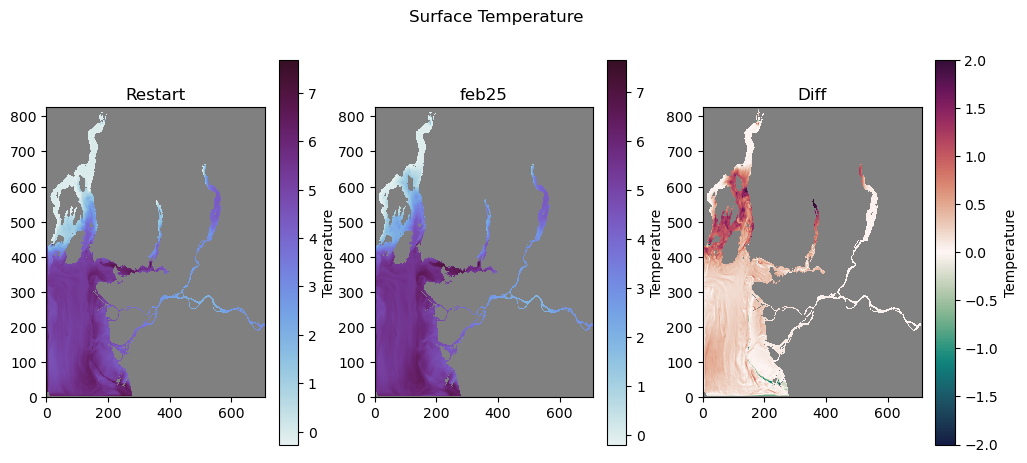

In [39]:
masked_tn = np.ma.masked_array(feb25_restart['tn'][0,0], mask=tmask[0])
masked_temp = np.ma.masked_array(feb25_GridT.votemper[23, 0], mask=tmask[0])

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_tn,cmap=cmap1)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('Temperature')
fig.suptitle('Surface Temperature')
ax.set_title('Restart')

pm = ax1.pcolormesh(masked_temp,cmap=cmap1)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('Temperature')
ax1.set_title('feb25')

pm = ax2.pcolormesh(masked_temp - masked_tn,cmap=cmap2,vmin=-2,vmax=2)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('Temperature')
ax2.set_title('Diff')

Text(0.5, 1.0, 'Diff')

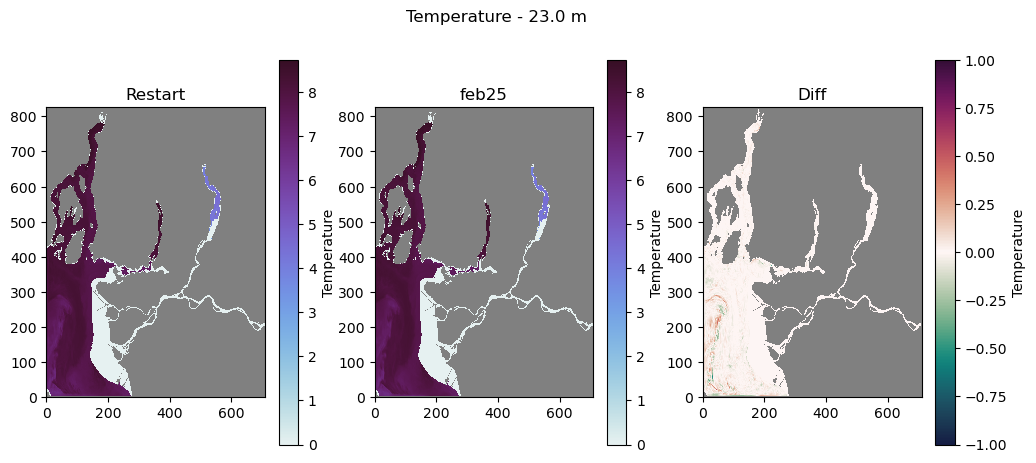

In [43]:
masked_tnD = np.ma.masked_array(feb25_restart['tn'][0,20], mask=tmask[0])
masked_tempD = np.ma.masked_array(feb25_GridT.votemper[23, 20], mask=tmask[0])

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_tnD,cmap=cmap1)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('Temperature')
fig.suptitle(f'Temperature - {np.round(mesh.gdepw_1d[0,20].values)} m')
ax.set_title('Restart')

pm = ax1.pcolormesh(masked_tempD,cmap=cmap1)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('Temperature')
ax1.set_title('feb25')

pm = ax2.pcolormesh(masked_tempD - masked_tnD,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('Temperature')
ax2.set_title('Diff')

### Look at u-velocity

Text(0.5, 1.0, 'Diff')

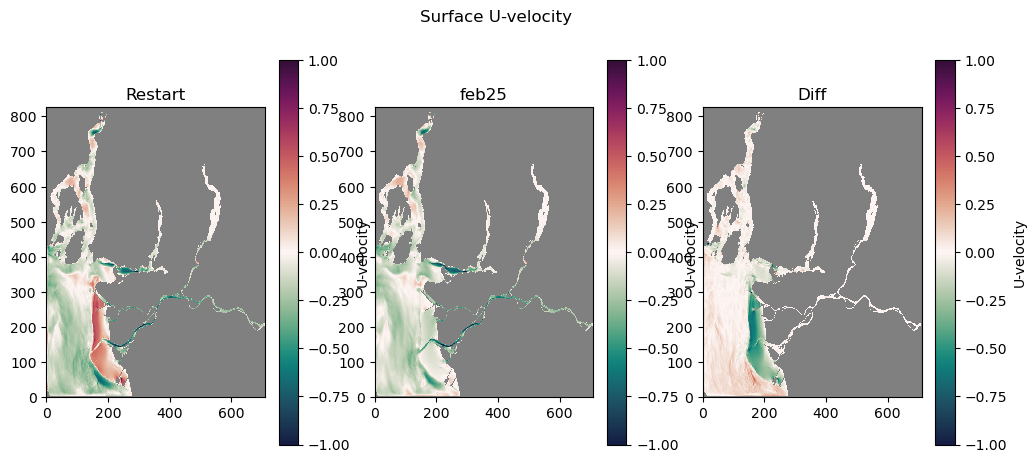

In [46]:
masked_un = np.ma.masked_array(feb25_restart['un'][0,0], mask=umask[0])
masked_uvel = np.ma.masked_array(feb25_GridU.vozocrtx[23, 0], mask=umask[0])

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_un,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('U-velocity')
fig.suptitle('Surface U-velocity')
ax.set_title('Restart')

pm = ax1.pcolormesh(masked_uvel,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('U-velocity')
ax1.set_title('feb25')

pm = ax2.pcolormesh(masked_uvel - masked_un,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('U-velocity')
ax2.set_title('Diff')

Text(0.5, 1.0, 'Diff')

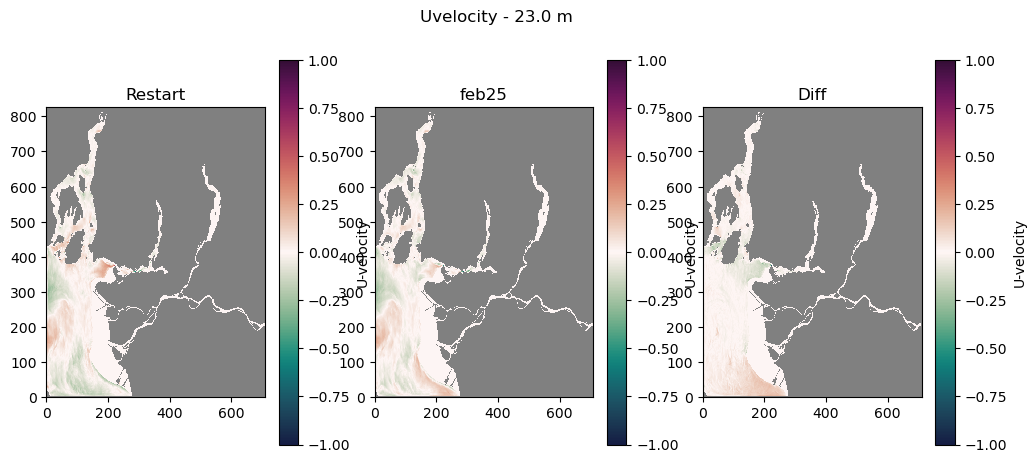

In [49]:
masked_unD = np.ma.masked_array(feb25_restart['un'][0,20], mask=umask[0])
masked_uvelD = np.ma.masked_array(feb25_GridU.vozocrtx[23, 20], mask=umask[0])

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_unD,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('U-velocity')
fig.suptitle(f'Uvelocity - {np.round(mesh.gdepw_1d[0,20].values)} m')
ax.set_title('Restart')

pm = ax1.pcolormesh(masked_uvelD,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('U-velocity')
ax1.set_title('feb25')

pm = ax2.pcolormesh(masked_uvelD - masked_unD,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('U-velocity')
ax2.set_title('Diff')

### Look at v-velocity

Text(0.5, 1.0, 'Diff')

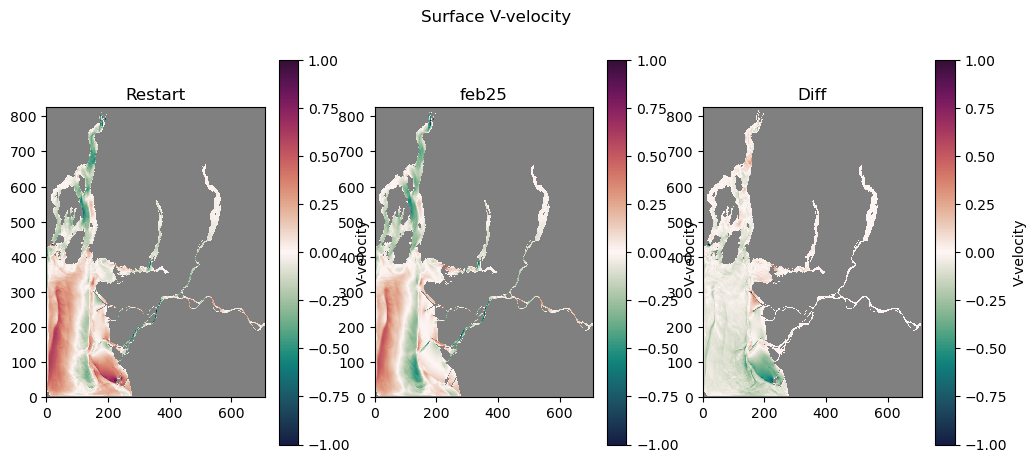

In [54]:
masked_vn = np.ma.masked_array(feb25_restart['vn'][0,0], mask=vmask[0])
masked_vvel = np.ma.masked_array(feb25_GridV.vomecrty[23, 0], mask=vmask[0])

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_vn,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('V-velocity')
fig.suptitle('Surface V-velocity')
ax.set_title('Restart')

pm = ax1.pcolormesh(masked_vvel,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('V-velocity')
ax1.set_title('feb25')

pm = ax2.pcolormesh(masked_vvel - masked_vn,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('V-velocity')
ax2.set_title('Diff')

Text(0.5, 1.0, 'Diff')

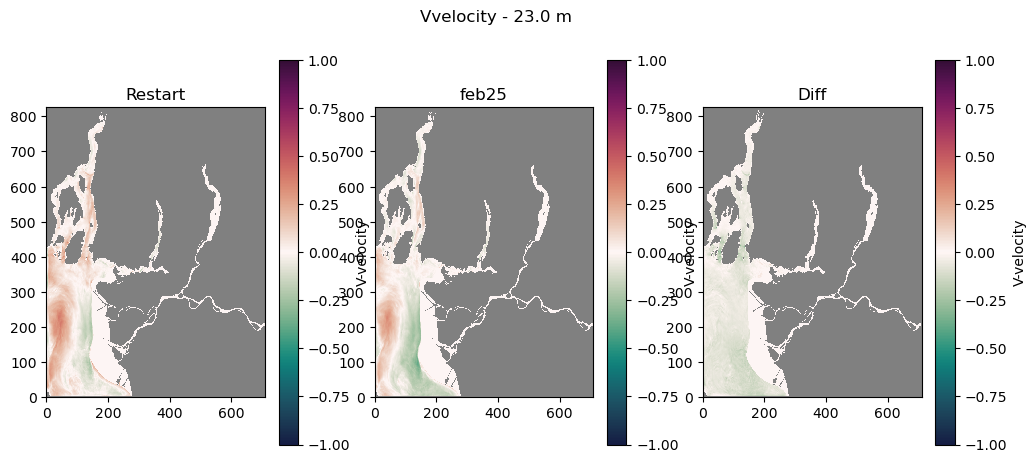

In [55]:
masked_vnD = np.ma.masked_array(feb25_restart['vn'][0,20], mask=vmask[0])
masked_vvelD = np.ma.masked_array(feb25_GridV.vomecrty[23, 20], mask=vmask[0])

fig, [ax,ax1,ax2] = plt.subplots(1, 3,figsize=(12,5))

pm = ax.pcolormesh(masked_vnD,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('V-velocity')
fig.suptitle(f'Vvelocity - {np.round(mesh.gdepw_1d[0,20].values)} m')
ax.set_title('Restart')

pm = ax1.pcolormesh(masked_vvelD,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('V-velocity')
ax1.set_title('feb25')

pm = ax2.pcolormesh(masked_vvelD - masked_vnD,cmap=cmap2,vmin=-1,vmax=1)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('V-velocity')
ax2.set_title('Diff')